In [1]:
from threading import main_thread
from unittest import result

from sklearn import naive_bayes

# from .feature_engineering import Data_preprocessing
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import scikitplot as skplt
import os

re=[]
columns = ['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
            'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
            'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
            'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
            'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
            'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
            'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
            'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
            'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
            'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
            'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
            'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
            'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
            'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
            'Packet _Length_Std', ' Packet_Length_Variance', 'FIN_Flag_Count',
            'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count',
            'ACK_Flag_Count', 'URG_Flag_Count', 'CWE_Flag_Count',
            'ECE_Flag_Count', 'Down/Up_Ratio', 'Average_Packet_Size',
            'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size',
            'Fwd_Header_Length.1', 'Fwd_Avg_Bytes/Bulk', '_Fwd_Avg_Packets/Bulk',
            'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes/Bulk', 'Bwd_Avg_Packets/Bulk',
            'Bwd_Avg_Bulk_Rate', 'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes',
            'Subflow_Bwd_Packets', 'Subflow_Bwd_Bytes', 'Init_Win_bytes_forward',
            'Init_Win_bytes_backward', 'act_data_pkt_fwd',
            'min_seg_size_forward', 'Active_Mean', 'Active_Std', 'Active_Max',
            'Active Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min',
            'Label']
csvfile = '/root/data/fxg/csv'

# csvfile = "/root/data/fxg/csv"
all_scv_list = os.listdir(csvfile)
for single_csv in all_scv_list:
    single_data = pd.read_csv(os.path.join(csvfile, single_csv), header=1)
    if single_csv == all_scv_list[0]:
        data = single_data
    else:
        data = pd.concat([data, single_data], ignore_index=True)
data.columns = columns
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.Label[data['Label'] != 'BENIGN'] = 1
data.Label[data['Label'] == 'BENIGN'] = 0

X = data.drop(['Label'], axis=1)
labelencoder_x=LabelEncoder()
for i in columns[:-1]:
    X[i]=labelencoder_x.fit_transform(X[i])
y = data['Label'].astype(int)


# 标准化
transfer = MinMaxScaler(feature_range=(2, 3))
X = transfer.fit_transform(X)

# 降维
transfer = VarianceThreshold(threshold=0.0)
X = transfer.fit_transform(X)
# 主成分分析
transfer = PCA(n_components=0.9)
X = transfer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=20)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#KNN
from sklearn.model_selection import GridSearchCV
def KNN(train_X=X_train, train_Y=y_train, test_X=X_test, test_Y=y_test):
    # print('[KNN] train...')
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(train_X, train_Y)
    y_hat=knn.predict(test_X)

    #模型评估
    acc = accuracy_score(test_Y, y_hat)  #
    # t2 = time.time()
    # print('准确率:', acc)
    # print('总耗时:', t2 - t1, 'sec')
    # print('精确度:', accuracy_score(test_Y, y_hat))
    # print('混淆矩阵：\n',confusion_matrix(test_Y, y_hat))
    # print('KNN分类报告为：\n',classification_report(test_Y,y_hat))
    # print("KNN均方差为：\n", mean_squared_error(test_Y, y_hat))
    # print('-' * 20)
    acc=accuracy_score(test_Y,y_hat)  #精确度
    cr=classification_report(test_Y,y_hat).replace('\n',' ').split()  #混淆矩阵
    cr=list(map(float,[cr[5],cr[6],cr[7],cr[8],cr[10],cr[11],cr[12],cr[13],cr[15],cr[16],cr[19],cr[20],cr[21],cr[22],cr[25],cr[26],cr[27],cr[28],]))
    matrix=confusion_matrix(test_Y, y_hat)  #KNN分类报告
    mse=mean_squared_error(test_Y, y_hat)   #KNN均方差
    return acc,matrix,cr,mse,knn

#随机深林
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
def RF(train_X=X_train, train_Y=y_train, test_X=X_test, test_Y=y_test):
    # print("Random Forest Classifier")
    # t1 = time.time()
    rfc = RandomForestClassifier()
    rfc.fit(train_X, train_Y)
    y_hat = rfc.predict(test_X)
    # t2 = time.time()
    # print('精确度:', accuracy_score(test_Y, y_hat)) 
    # print('混淆矩阵：\n',confusion_matrix(test_Y, y_hat))
    # print("随机森林-均方差为：\n", mean_squared_error(test_Y, y_hat))
    # print('随即森林分类报告：\n',classification_report(test_Y, y_hat))
    # print('-' * 40)
    # fig = plt.figure(figsize=(20,10))
    # feature_name=data.drop(['Label'],axis=1).columns
    # # ax1 = fig.add_subplot(121)
    # skplt.estimators.plot_feature_importances(rfc,feature_names=feature_name,
    #                                         title="Random Forest Regressor Feature Importance",
    #                                         x_tick_rotation=90)
    # print(rfc.feature_importances_)
    acc=accuracy_score(test_Y,y_hat)
    cr=classification_report(test_Y,y_hat).replace('\n',' ').split()
    cr=list(map(float,[cr[5],cr[6],cr[7],cr[8],cr[10],cr[11],cr[12],cr[13],cr[15],cr[16],cr[19],cr[20],cr[21],cr[22],cr[25],cr[26],cr[27],cr[28],]))
    matrix=confusion_matrix(test_Y, y_hat)
    mse=mean_squared_error(test_Y, y_hat)
    return acc,matrix,cr,mse,rfc
    # print('------------\n')
    # # plt.tight_layout()
    # plt.show()
    # plot_confusion_matrix(matrix, label, True, 'RF Confusion matrix')


from sklearn.svm import SVC
def SVM(train_X=X_train, train_Y=y_train, test_X=X_test, test_Y=y_test):
    # print('[SVM] train ...')
    # train_Y = [np.where(r == 1)[0][0] for r in train_Y]
    # test_Y = [np.where(r == 1)[0][0] for r in test_Y]
    # t1 = time.time()
    clf = SVC(decision_function_shape='ovr', max_iter=300, kernel='rbf')
    model = clf.fit(train_X, train_Y)
    y_hat = model.predict(test_X)
    # t2 = time.time()
    # print('精确度:', accuracy_score(test_Y, y_hat))
    # print('耗时:', t2 - t1, '秒')    
    # print('混淆矩阵：\n',confusion_matrix(test_Y, y_hat))
    # print("SVM均方差为：\n", mean_squared_error(test_Y, y_hat))
    # print('SVM分类报告：\n',classification_report(test_Y, y_hat))
    fig = plt.figure(figsize=(50,15))
    
    # ax1 = fig.add_subplot(122)
    # skplt.estimators.plot_feature_importances(model,feature_names=feature_name,
    #                                         title="Random Forest Regressor Feature Importance",
    #                                         x_tick_rotation=90, order="ascending")
    # plt.tight_layout()
    # plt.show()
    acc=accuracy_score(test_Y,y_hat)
    cr=classification_report(test_Y,y_hat).replace('\n',' ').split()
    cr=list(map(float,[cr[5],cr[6],cr[7],cr[8],cr[10],cr[11],cr[12],cr[13],cr[15],cr[16],cr[19],cr[20],cr[21],cr[22],cr[25],cr[26],cr[27],cr[28],]))
    matrix=confusion_matrix(test_Y, y_hat)
    mse=mean_squared_error(test_Y, y_hat)
    return acc,matrix,cr,mse,clf
    # plot_confusion_matrix(matrix, label, True, 'SVM Confusion matrix')

from sklearn.naive_bayes import BernoulliNB
def NaiveBayes(train_X=X_train, train_Y=y_train, test_X=X_test, test_Y=y_test):
    # print('[Naive Bayes] train ...')
    # train_Y = [np.where(r == 1)[0][0] for r in train_Y]
    # test_Y = [np.where(r == 1)[0][0] for r in test_Y]
    # t1 = time.time()
    clf = BernoulliNB()
    model = clf.fit(train_X, train_Y)
    y_hat = model.predict(test_X)
    acc = accuracy_score(test_Y, y_hat)
    acc=accuracy_score(test_Y,y_hat)
    cr=classification_report(test_Y,y_hat).replace('\n',' ').split()
    cr=list(map(float,[cr[5],cr[6],cr[7],cr[8],cr[10],cr[11],cr[12],cr[13],cr[15],cr[16],cr[19],cr[20],cr[21],cr[22],cr[25],cr[26],cr[27],cr[28],]))
    matrix=confusion_matrix(test_Y, y_hat)
    mse=mean_squared_error(test_Y, y_hat)
    return acc,matrix,cr,mse,clf
    # t2 = time.time()
    # print('精确度:', accuracy_score(test_Y, y_hat))
    # print('耗时:', t2 - t1, '秒')    
    # print('混淆矩阵：\n',confusion_matrix(test_Y, y_hat))
    # print("朴素贝叶斯均方差为：\n", mean_squared_error(test_Y, y_hat))
    # print('朴素贝叶斯分类报告：\n',classification_report(test_Y, y_hat))
    # print('-' * 40)
    # plot_confusion_matrix(matrix, label, True, 'NB Confusion matrix')


#决策树
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def tree3(clf):
    fig = plt.figure(figsize=(35, 10))
    plot_tree(clf, fontsize=8)
    fig.savefig(os.path.join('./', "tree3.png"))


def DT(train_X=X_train, train_Y=y_train, test_X=X_test, test_Y=y_test):
    # t1 = time.time()
    clf = DecisionTreeClassifier(max_depth=5)
    model = clf.fit(train_X, train_Y)
    # print(clf.feature_importances_)
    y_hat = model.predict(test_X)
    acc=accuracy_score(test_Y,y_hat)
    cr=classification_report(test_Y,y_hat).replace('\n',' ').split()
    cr=list(map(float,[cr[5],cr[6],cr[7],cr[8],cr[10],cr[11],cr[12],cr[13],cr[15],cr[16],cr[19],cr[20],cr[21],cr[22],cr[25],cr[26],cr[27],cr[28],]))
    matrix=confusion_matrix(test_Y, y_hat)
    mse=mean_squared_error(test_Y, y_hat)
    return acc,matrix,cr,mse,clf
    # t2 = time.time()
    # print('精确度:', accuracy_score(test_Y, y_hat))
    # print('耗时:', t2 - t1, '秒')    
    # print('混淆矩阵：\n',confusion_matrix(test_Y, y_hat))
    # print("决策树均方差为：\n", mean_squared_error(test_Y, y_hat))
    # print('决策树分类报告：\n',classification_report(test_Y, y_hat))
    # fig = plt.figure(figsize=(50,15))
    # skplt.estimators.plot_feature_importances(model,feature_names=feature_name,
    #                                         title="Random Forest Regressor Feature Importance",
    #                                         x_tick_rotation=90)
    # plt.tight_layout()
    # plt.show()
    # print('-' * 40)
    # plot_confusion_matrix(matrix, label, True, 'DT Confusion matrix')

def return_info():
    if len(re)==0:
        knn_result=KNN()
        rf_result=RF()
        svm_result=SVM()
        nb_result=NaiveBayes()
        dt_result=DT()
        acc={'knn':knn_result[0],'rf':rf_result[0],'svm':svm_result[0],'nb':nb_result[0],'dt':dt_result[0]}
        matrix={'knn':knn_result[1],'rf':rf_result[1],'svm':svm_result[1],'nb':nb_result[1],'dt':dt_result[1]}
        cr={'knn':knn_result[2],'rf':rf_result[2],'svm':svm_result[2],'nb':nb_result[2],'dt':dt_result[2]}
        mse={'knn_':knn_result[3],'rf':rf_result[3],'svm':svm_result[3],'nb':nb_result[3],'dt':dt_result[3]}
        clf={'knn':knn_result[4],'rf':rf_result[4],'svm':svm_result[4],'nb':nb_result[4],'dt':dt_result[4]}
        re.append(acc)
        re.append(matrix)
        re.append(cr)
        re.append(mse)
        re.append(clf)
    return  re
re=return_info()

/tmp/ipykernel_4809/1919285458.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Label[data['Label'] != 'BENIGN'] = 1
/tmp/ipykernel_4809/1919285458.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Label[data['Label'] == 'BENIGN'] = 0
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


<Figure size 3600x1080 with 0 Axes>

In [6]:
list(re[2]['knn'])

[1.0,
 1.0,
 1.0,
 48595.0,
 0.99,
 0.97,
 0.98,
 659.0,
 1.0,
 49254.0,
 0.99,
 0.99,
 0.99,
 49254.0,
 1.0,
 1.0,
 1.0,
 49254.0]

In [19]:
# re1=re[2]['knn'].split('')
re[2]['knn'].replace('\n',' ').split()

['precision',
 'recall',
 'f1-score',
 'support',
 '正常数据',
 '1.00',
 '1.00',
 '1.00',
 '48595',
 '恶意数据',
 '0.99',
 '0.97',
 '0.98',
 '659',
 'accuracy',
 '1.00',
 '49254',
 'macro',
 'avg',
 '0.99',
 '0.99',
 '0.99',
 '49254',
 'weighted',
 'avg',
 '1.00',
 '1.00',
 '1.00',
 '49254']

In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns
import threading
from sklearn.datasets.samples_generator import make_classification
from sklearn.neighbors import KNeighborsClassifier
from bubbly.bubbly import bubbleplot
from plotly.offline import init_notebook_mode, iplot
from sanwei import k_means_run

/home/my/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)
    return plt

In [3]:
def JZ(juzheng):
    #confusion = np.array(([91, 0, 0,4], [0, 92, 1,4], [0, 0, 95,4],[1,1,1,1]))
    confusion = juzheng
    # 热度图，后面是指定的颜色块，可设置其他的不同颜色
    plt.imshow(confusion, cmap=plt.cm.Blues)
    # ticks 坐标轴的坐标点
    # label 坐标轴标签说明
    indices = range(len(confusion))
    plt.xticks(indices, [1, 3, 3,4,5,6,7,8,9,10])
    plt.yticks(indices, [1, 2, 3,4,5,6,7,8,9,10])
    plt.colorbar()
    plt.xlabel('预测值')
    plt.ylabel('真实值')
    plt.title('混淆矩阵')
    sns.set(font_scale=0.8)
    # plt.rcParams两行是用于解决标签不能显示汉字的问题
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    # 显示数据
    for first_index in range(len(confusion)):  # 第几行
        for second_index in range(len(confusion[first_index])):  # 第几列
            plt.text(first_index, second_index, confusion[first_index][second_index])
    # 在matlab里面可以对矩阵直接imagesc(confusion)
    # 显示
    plt.show()

In [4]:
def xiao_ti_qing(a):
    #小提琴图
    a['categoryname'].value_counts()  # 对分类变量的类别进行计数
    # 后面将研究不同类型的'gearbox'对应'price'的差异
    x = a['categoryname']
    y = a['notified']  # 在原数据集中，'price'为目标变量
    # 绘制小提琴图
    sns.violinplot(x=x, y=y, data=a)
    plt.show()
    # 在sns.violinplot中，x是类别变量，y是数值型变量，data用于指定数据集

In [5]:
def xiang_guan(a):
    # 特征间相关系数热力图
    f = a.corr()
    sns.heatmap(f, annot=True)
    plt.show()

In [6]:
def categoryname(a):
    X = a.drop(["categoryname"], axis=1)  # 11829
    y = a["categoryname"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # 标准化
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Random Forest Classifier
    print("***************[categoryname]*****************")
    print("Random Forest Classifier")
    # n_estimators，表示选择多少棵树来构造随机森林；具体解释看《边学边练超系统掌握人工智机器学习算法 传智播客》
    rfc = RandomForestClassifier(n_estimators=200)
    rfc.fit(X_train, y_train)
    pred_rfc = rfc.predict(X_test)
    print("Random Forest classification_report==\n", classification_report(y_test, pred_rfc))
    print("Random Forest confusion_matrix==\n", confusion_matrix(y_test, pred_rfc))
    # 混淆矩阵可视化
    # t1 = threading.Thread(target=JZ,args=[confusion_matrix(y_test, pred_rfc)])
    # t1.start()
    JZ(confusion_matrix(y_test, pred_rfc))

In [7]:
def notified(a):
    X = a.drop(["notified"], axis=1)  # 11829
    y = a["notified"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # 标准化
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Random Forest Classifier
    print("******************[notified]******************")
    print("Random Forest Classifier")
    # n_estimators，表示选择多少棵树来构造随机森林；具体解释看《边学边练超系统掌握人工智机器学习算法 传智播客》
    rfc = RandomForestClassifier(n_estimators=200)
    rfc.fit(X_train, y_train)
    pred_rfc = rfc.predict(X_test)
    print("Random Forest classification_report==\n", classification_report(y_test, pred_rfc))
    print("Random Forest confusion_matrix==\n", confusion_matrix(y_test, pred_rfc))
    error = mean_squared_error(y_test, pred_rfc)
    print("随机森林-均方差为：\n", error)

    estimator = KNeighborsClassifier(n_neighbors=3)
    estimator.fit(X_train, y_train)
    print("KNN classification_report==\n", classification_report(y_test, estimator.predict(X_test)))
    error = mean_squared_error(y_test, estimator.predict(X_test))
    print("KNN-均方差为：\n", error)


    # SVM Classifier
    print("SVM Classifier")
    svmc = svm.SVC()
    svmc.fit(X_train, y_train)
    pred_svmc = svmc.predict(X_test)
    print("SVM classification_report==\n", classification_report(y_test, pred_svmc))
    print("SVM classification_confusion_matrix==\n", confusion_matrix(y_test, pred_svmc))
    error = mean_squared_error(y_test, pred_svmc)
    print("SVM-均方误差为：\n", error)

    # Neural Network
    print("Neural Network")
    mlpc = MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)
    mlpc.fit(X_train, y_train)
    pred_mlpc = mlpc.predict(X_test)
    print("Neural Network classification_report==\n", classification_report(y_test, pred_mlpc))
    print("Neural Network confusion_matrix==\n", confusion_matrix(y_test, pred_mlpc))
    error = mean_squared_error(y_test, pred_mlpc)
    print("神经网络-均方误差为：\n", error)


In [8]:
path = "cybersecurity_training.csv"
a = pd.read_csv(path, delimiter=",")

In [9]:
# drop（）方法是
a = a.drop(columns=['alert_ids', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'score',
                    'grandparent_category', 'weekday', 'ip', 'ipcategory_name', 'ipcategory_scope',
                    'parent_category',
                    'timestamp_dist', 'start_hour', 'start_minute', 'start_second', 'thrcnt_month', 'thrcnt_week',
                    'thrcnt_day'])

col_str = ['client_code', 'categoryname', 'dstipcategory_dominate', 'srcipcategory_dominate']

print(len(a))

39427


In [10]:
# Converting non-numeric data into numeric data
## 离散型的数据转换成 0 0 0 到 n − 1 n-1 n−1 之间的数
for i in col_str:
    label_enc = LabelEncoder()
    label_enc.fit(a[i])
    a[i] = label_enc.transform(a[i])

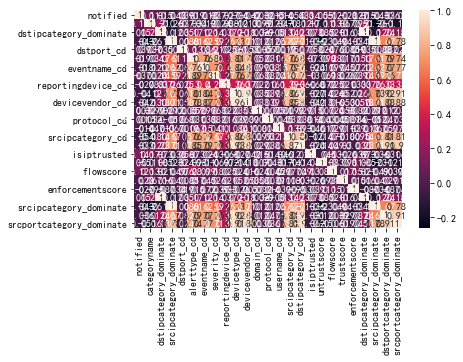

In [11]:
# 特征间相关系数热力图
a_ = a[['notified','categoryname','dstipcategory_dominate','srcipcategory_dominate','dstport_cd','alerttype_cd',\
        'eventname_cd','severity_cd','reportingdevice_cd','devicetype_cd','devicevendor_cd','domain_cd','protocol_cd','username_cd',\
        'srcipcategory_cd','dstipcategory_cd','isiptrusted','untrustscore','flowscore','trustscore','enforcementscore',\
        'dstipcategory_dominate','srcipcategory_dominate','dstportcategory_dominate','srcportcategory_dominate']]
xiang_guan(a_)

In [12]:
#受到攻击是否收到警告通知
notified(a)

******************[notified]******************
Random Forest Classifier
Random Forest classification_report==
              precision    recall  f1-score   support

          0       0.95      0.99      0.97     11123
          1       0.50      0.20      0.28       706

avg / total       0.92      0.94      0.93     11829

Random Forest confusion_matrix==
 [[10984   139]
 [  566   140]]
随机森林-均方差为：
 0.05959928988080142
KNN classification_report==
              precision    recall  f1-score   support

          0       0.95      0.98      0.97     11123
          1       0.38      0.16      0.23       706

avg / total       0.91      0.93      0.92     11829

KNN-均方差为：
 0.06560148786879702
SVM Classifier
SVM classification_report==
              precision    recall  f1-score   support

          0       0.94      1.00      0.97     11123
          1       0.71      0.01      0.01       706

avg / total       0.93      0.94      0.91     11829

SVM classification_confusion_matrix==
 [[11

***************[categoryname]*****************
Random Forest Classifier


/home/my/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Random Forest classification_report==
              precision    recall  f1-score   support

          0       0.94      0.95      0.94      7027
          1       0.94      0.93      0.93       134
          2       0.95      0.93      0.94       111
          3       0.79      0.75      0.77       836
          4       0.85      0.88      0.87      2649
          5       0.18      0.17      0.17        36
          6       0.88      0.80      0.84       610
          7       0.00      0.00      0.00         1
          8       0.54      0.45      0.49       183
          9       0.57      0.42      0.48       242

avg / total       0.89      0.89      0.89     11829

Random Forest confusion_matrix==
 [[6685    1    0   45  184    9   41    0    8   54]
 [   4  124    0    1    5    0    0    0    0    0]
 [   1    1  103    0    4    2    0    0    0    0]
 [  72    1    2  625  111   12    4    0    4    5]
 [ 144    4    3   85 2337    2   15    0   48   11]
 [   3    0    0   22  

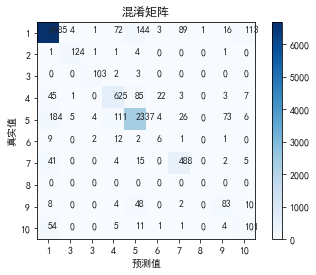

In [13]:
# categoryname混淆矩阵可视化
# t1 = threading.Thread(target=JZ,args=[confusion_matrix(y_test, pred_rfc)])
# t1.start()
categoryname(a)

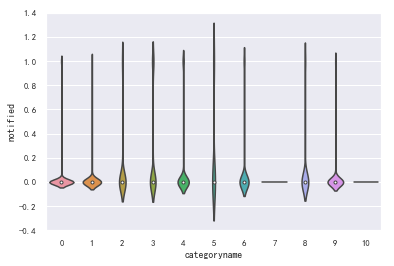

In [14]:
# 哪几种类别攻击的严重程度更容易被检测到
xiao_ti_qing(a)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:902: RuntimeWarning:

invalid value encountered in sqrt



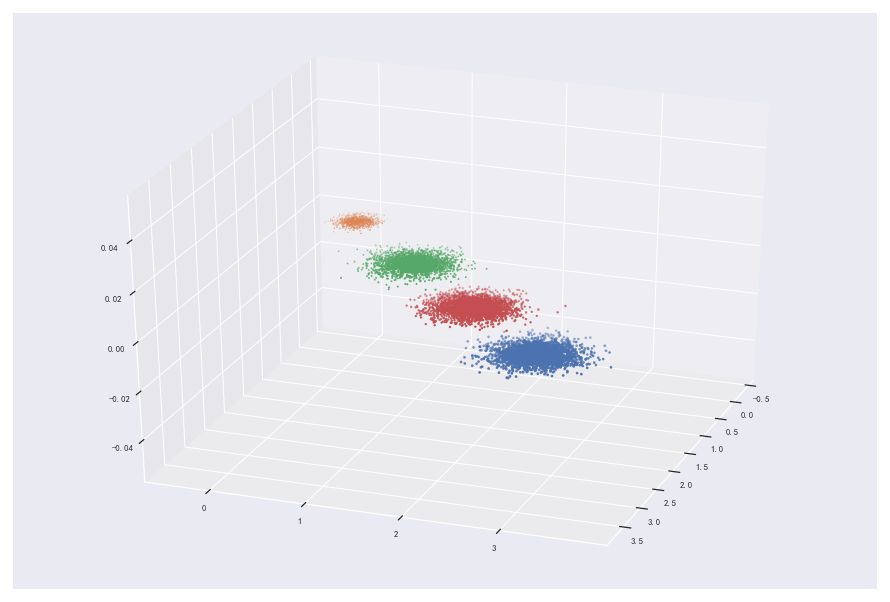

In [15]:
#k_means聚类三维可视化
k_means_run()